<a href="https://colab.research.google.com/github/profsong/ortools/blob/main/SOURCE_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Python
import pandas as pd
from prophet import Prophet

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lj0cupj/870da5or.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lj0cupj/75w68ei7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76803', 'data', 'file=/tmp/tmp6lj0cupj/870da5or.json', 'init=/tmp/tmp6lj0cupj/75w68ei7.json', 'output', 'file=/tmp/tmp6lj0cupj/prophet_modela3iavto5/prophet_model-20231208081349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:13:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


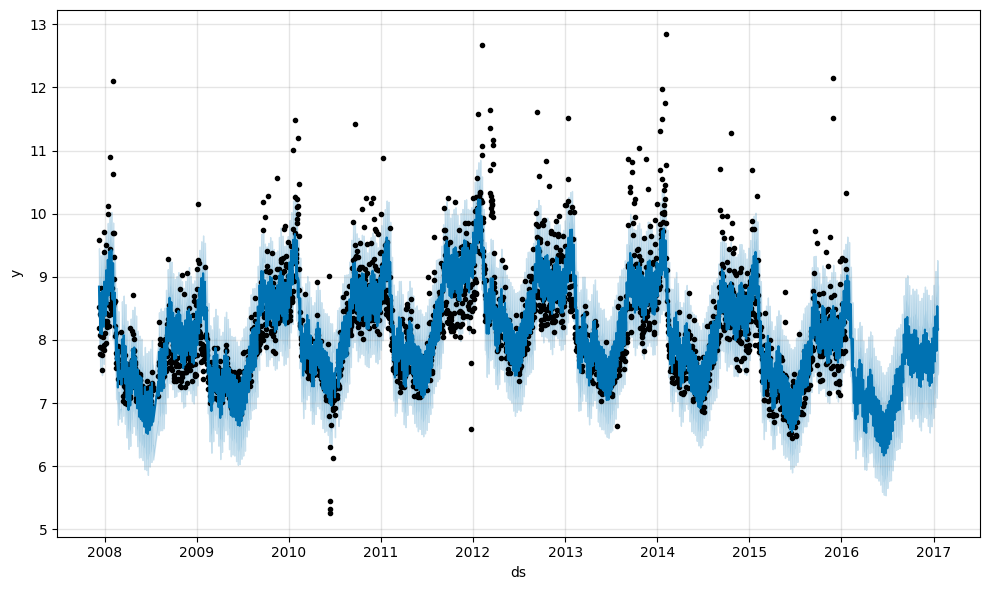

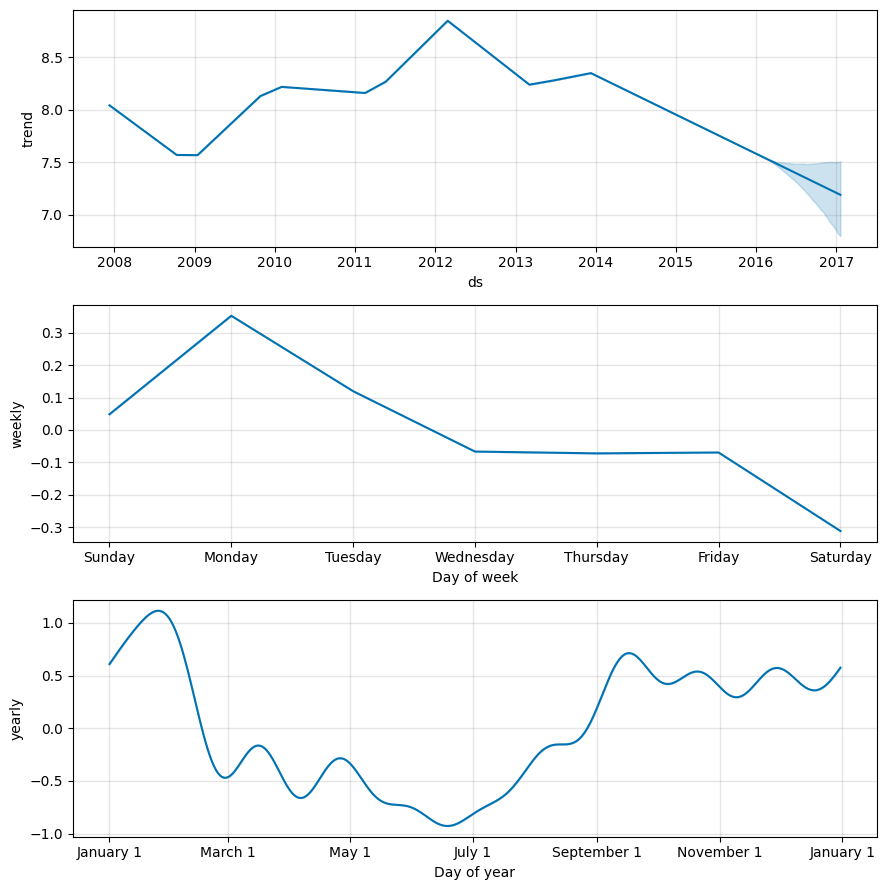

In [3]:

m = Prophet()

m.fit(df)

future = m.make_future_dataframe(periods=365)

future.tail()

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)


In [4]:

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

plot_components_plotly(m, forecast)

